<img src="http://cfs22.simplicdn.net/ice9/new_logo.svgz "/>

# Project 04: Movielens Dataset Analysis

You don't need to limit yourself to the number of rows/cells provided. You can add additional rows in each section to add more lines of code.

**Happy coding!**

In [3]:
import pandas as pd
import numpy as np
% matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
ratings =  pd.read_csv("ratings.dat", names = ['UserID','MovieID','Ratings','Timestamp'], delimiter = "::", engine = 'python')
ratings.head()

#if no 'names' parameter is passed, the first row is used as column names. 
#engine =  'python' to suppress a ParserWarning. Not needed as such. 

,UserID,MovieID,Ratings,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [339]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 4 columns):
UserID       1000209 non-null int64
MovieID      1000209 non-null int64
Ratings      1000209 non-null int64
Timestamp    1000209 non-null int64
dtypes: int64(4)
memory usage: 30.5 MB


In [340]:
print(ratings.shape)
print(ratings.nunique())

(1000209, 4)
UserID         6040
MovieID        3706
Ratings           5
Timestamp    458455
dtype: int64


In [5]:
movies =  pd.read_csv("movies.dat", names = ['MovieID', 'Title', 'Genres'], delimiter = "::", engine = 'python')
movies.head()


,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [342]:
print(movies.shape)
print(movies.nunique())

(3883, 3)
MovieID    3883
Title      3883
Genres      301
dtype: int64


In [6]:
users = pd.read_csv("users.dat", names = ['UserID', 'Gender','Age','Occupation' ,'Zip'], delimiter = "::", engine = 'python')
users.head()

,UserID,Gender,Age,Occupation,Zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [344]:
print(users.shape)
print(users.nunique())

(6040, 5)
UserID        6040
Gender           2
Age              7
Occupation      21
Zip           3439
dtype: int64


#### User Age Distribution 

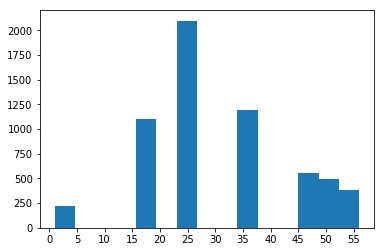

In [345]:
fig = plt.figure()
plt.hist(users.Age, bins = 15)
plt.xticks(np.arange(0,60,5));

While interpreting above histogram, please note that in orginal data, age is chosen from the following ranges:

	*  1:  "Under 18"
	* 18:  "18-24"
	* 25:  "25-34"
	* 35:  "35-44"
	* 45:  "45-49"
	* 50:  "50-55"
	* 56:  "56+"
    
 This shows that most responses for ratings have come from the users who are from 25-34 year age group.   

#### Rating vs User Count for Each Movie

In [346]:
aa = ratings.groupby(['MovieID', 'Ratings'])['UserID'].count()
bb = pd.DataFrame(aa)
bb[:10]

UserID
MovieID Ratings        
1       1            16
        2            61
        3           345
        4           835
        5           820
2       1            42
        2           108
        3           266
        4           237
        5            48

#### Top 10 Most responded Movie

In [347]:
cc = bb.groupby('MovieID')['UserID'].sum()
cc.sort_values(ascending = False)[:10]

MovieID
2858    3428
260     2991
1196    2990
1210    2883
480     2672
2028    2653
589     2649
2571    2590
1270    2583
593     2578
Name: UserID, dtype: int64

*The movie with MovieID 2858 has been rated by most users (3428).*

Text(0.5,1,'Movie vs User Count')

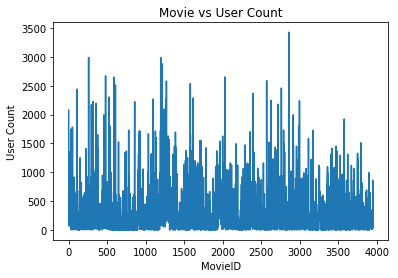

In [348]:
%matplotlib inline
dd =pd.DataFrame(cc).reset_index()
plt.plot(dd['MovieID'], dd['UserID']);
plt.xlabel('MovieID')
plt.ylabel('User Count')
plt.title('Movie vs User Count')

#### Story of 'Toy Story'

In [349]:
a = movies['Title'].str.find('Toy Story')
a[a > -1]

0       0
3045    0
Name: Title, dtype: int64

This means we have 2 movies with 'Toy Story' being part of their names in `movies` database.

In [350]:
movies.loc[0], movies.loc[3045]

(MovieID                              1
 Title                 Toy Story (1995)
 Genres     Animation|Children's|Comedy
 Name: 0, dtype: object, MovieID                           3114
 Title               Toy Story 2 (1999)
 Genres     Animation|Children's|Comedy
 Name: 3045, dtype: object)

We are interested in original 'Toy Story' rather than its sequel. Here we find that its `MovieID` is 1

In [351]:
bb.loc[1]  #ratings distribution of Toy Story

,UserID
Ratings,
1,16
2,61
3,345
4,835
5,820


This shows that 820 users gave it 5 star while only 16 gave it single star. Seems like movie is actually good!

In [352]:
bbdf = bb.loc[1].reset_index()
(bbdf['Ratings']*bbdf['UserID']).sum()/bbdf['UserID'].sum()

4.1468464130958109

In [353]:
bbdf['UserID'].sum()

2077

We find that average rating for Toy Story is 4 based on 2077 users' response. 

In [354]:
toys = ratings[ratings['MovieID'] == 1]
print(len(toys))
toys[:10]

2077


,UserID,MovieID,Ratings,Timestamp
40,1,1,5,978824268
469,6,1,4,978237008
581,8,1,4,978233496
711,9,1,5,978225952
837,10,1,5,978226474
1966,18,1,4,978154768
2276,19,1,5,978555994
2530,21,1,3,978139347
2870,23,1,4,978463614
3405,26,1,3,978130703


In [355]:
toys.index = range(2077)
toys[:4]

,UserID,MovieID,Ratings,Timestamp
0,1,1,5,978824268
1,6,1,4,978237008
2,8,1,4,978233496
3,9,1,5,978225952


In [356]:
toy_age = pd.merge(toys, users, how = 'left')
toy_age[:5]

,UserID,MovieID,Ratings,Timestamp,Gender,Age,Occupation,Zip
0,1,1,5,978824268,F,1,10,48067
1,6,1,4,978237008,F,50,9,55117
2,8,1,4,978233496,M,25,12,11413
3,9,1,5,978225952,M,25,17,61614
4,10,1,5,978226474,F,35,1,95370


In [357]:
toy_age.groupby('Age')['UserID'].count()

Age
1     112
18    448
25    790
35    423
45    143
50    108
56     53
Name: UserID, dtype: int64

Here age group 25 implies the actual age group of 25-34 year. As obvious from above detail, the age group 25-34 has the highest percentage of total viewership in case of movie Toy Story, followed by the age group 18-24. 

#### Top 25 Movies by Viewership Ratings

In [358]:
foo = bb.reset_index('Ratings')
foo[:3]

,Ratings,UserID
MovieID,,
1,1,16
1,2,61
1,3,345


In [359]:
def rat(x):
    x['Ratings'] =(x['Ratings']*x['UserID']).sum()/x['UserID'].sum()
    return x
foo = foo.groupby('MovieID').apply(rat)
foo.groupby('MovieID')['Ratings'].mean().sort_values(ascending = False)[:25]

MovieID
3382    5.000000
3172    5.000000
3607    5.000000
3656    5.000000
3280    5.000000
787     5.000000
1830    5.000000
989     5.000000
3881    5.000000
3233    5.000000
3245    4.800000
53      4.750000
2503    4.666667
2905    4.608696
2019    4.560510
318     4.554558
858     4.524966
745     4.520548
50      4.517106
527     4.510417
1148    4.507937
2309    4.500000
3888    4.500000
439     4.500000
1795    4.500000
Name: Ratings, dtype: float64

Above is the list of top 25 movies based on average ratings by user. However, this list is not reliable and a bad indicator. This list tells us that movie with MovieID 3382 has average rating of 5. When we go into details, we find that this movie was rated by only 1 viewer.

In [362]:
movies.values[3382]

array([3451, "Guess Who's Coming to Dinner (1967)", 'Comedy|Drama'], dtype=object)

In [309]:
cc.loc[3382]

1

In [310]:
bb.loc[3382] #one user

,UserID
Ratings,
5,1


#### Ratings Analysis of User with UserID 2696

In [364]:
us2696 = ratings.loc[ratings['UserID'] == 2696]  #this is how you search rows having a value in a particular column
us2696.groupby('Ratings')['MovieID'].count()

Ratings
1     2
2     3
3     3
4    11
5     1
Name: MovieID, dtype: int64

User with UserID 2696 has rated 20 movies in total. Out of 20 movies he rated, 11 were given 4 star. He gave 5 star to only 1 movie. 

In [367]:
us_2696 = pd.merge(us2696, movies, how = 'left')
us_2696

,UserID,MovieID,Ratings,Timestamp,Title,Genres
0,2696,1258,4,973308710,"Shining, The (1980)",Horror
1,2696,1270,2,973308676,Back to the Future (1985),Comedy|Sci-Fi
2,2696,1617,4,973308842,L.A. Confidential (1997),Crime|Film-Noir|Mystery|Thriller
3,2696,1625,4,973308842,"Game, The (1997)",Mystery|Thriller
4,2696,1644,2,973308920,I Know What You Did Last Summer (1997),Horror|Mystery|Thriller
5,2696,1645,4,973308904,"Devil's Advocate, The (1997)",Crime|Horror|Mystery|Thriller
6,2696,1805,4,973308886,Wild Things (1998),Crime|Drama|Mystery|Thriller
7,2696,1892,4,973308904,"Perfect Murder, A (1998)",Mystery|Thriller
8,2696,800,5,973308842,Lone Star (1996),Drama|Mystery
9,2696,2338,2,973308920,I Still Know What You Did Last Summer (1998),Horror|Mystery|Thriller


Text(0.5,1,'Ratings Data by UserID-2696')

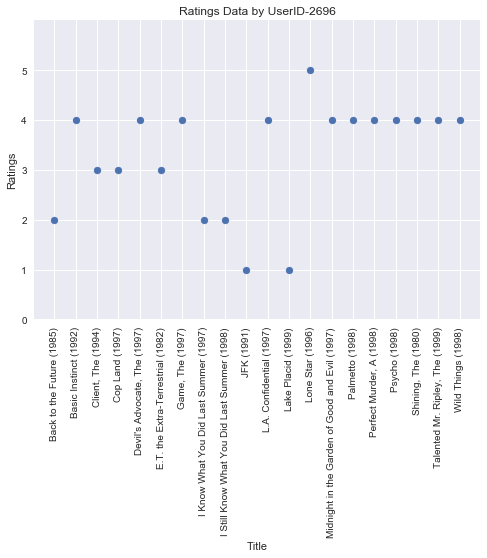

In [380]:
plt.style.use('seaborn')
plt.scatter(us_2696['Title'], us_2696['Ratings'])
plt.xticks(rotation = 'vertical');
plt.xlabel('Title')
plt.ylabel('Ratings')
plt.ylim(1,6)
plt.yticks(np.arange(0,6));
plt.title('Ratings Data by UserID-2696')

In [7]:
data = pd.merge(ratings, users, how = 'inner')

In [6]:
data[:3]

,UserID,MovieID,Ratings,Timestamp,Gender,Age,Occupation,Zip
0,1,1193,5,978300760,F,1,10,48067
1,1,661,3,978302109,F,1,10,48067
2,1,914,3,978301968,F,1,10,48067


In [8]:
data = data.drop(['Timestamp','Gender','Zip'], axis =  1)
data[:3]

,UserID,MovieID,Ratings,Age,Occupation
0,1,1193,5,1,10
1,1,661,3,1,10
2,1,914,3,1,10


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000209 entries, 0 to 1000208
Data columns (total 5 columns):
UserID        1000209 non-null int64
MovieID       1000209 non-null int64
Ratings       1000209 non-null int64
Age           1000209 non-null int64
Occupation    1000209 non-null int64
dtypes: int64(5)
memory usage: 45.8 MB


#### Machine Learning 

In [9]:
X = data.drop('Ratings', axis = 1)
y = data['Ratings']

from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=1)

from sklearn.naive_bayes import GaussianNB # 1. choose model class
model = GaussianNB()                       # 2. instantiate model
model.fit(Xtrain, ytrain)                  # 3. fit model to data
y_model = model.predict(Xtest)             # 4. predict 

from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.34797023031117402

In [10]:
from sklearn.neural_network import MLPClassifier
nn = MLPClassifier(solver='lbfgs')
nn.fit(Xtrain, ytrain)
y_pred = nn.predict(Xtest)
accuracy_score(ytest, y_pred)

MemoryError: 

In [11]:
from sklearn.linear_model import SGDClassifier
model = SGDClassifier()
model.fit(Xtrain, ytrain)                  # 3. fit model to data
y_model = model.predict(Xtest)             # 4. predict 

from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

C:\miniconda3\envs\data\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


0.22163701295325391

In [12]:
from sklearn.tree import DecisionTreeClassifier
mod = DecisionTreeClassifier()
mod.fit(Xtrain,ytrain)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [13]:
y_model = model.predict(Xtest)           

from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.22163701295325391